In [ ]:
!pip install networkx matplotlib


# Vertex Cover Approximation: Greedy vs Monte Carlo

## Objective

This project implements and compares two approximation algorithms for solving the **Vertex Cover Problem**:
- **Greedy Algorithm** (highest degree heuristic)
- **Monte Carlo Algorithm** (random edge picking)

We evaluate performance on synthetic graphs of varying sizes and densities by analyzing:
- Size of the vertex cover
- Execution time
- Scalability and robustness


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import numpy as np


##  Graph Generation

We generate **undirected connected graphs** with:
- Varying node counts: 100, 500, 1000, 5000
- Edge densities: average degrees of 2, 4, and 8

We use NetworkX to generate random graphs and ensure connectivity.


In [ ]:
def generate_connected_graph(n, avg_degree, seed=None):
    random.seed(seed)
    while True:
        G = nx.gnm_random_graph(n, int(n * avg_degree / 2), seed=seed)
        if nx.is_connected(G):
            return G


## Algorithm Implementation

We implement:
- **Greedy Approximation**: repeatedly picks the vertex with the highest degree.
- **Monte Carlo Approximation**: repeatedly picks a random uncovered edge and adds both endpoints.


In [ ]:
def greedy_vertex_cover(G):
    cover = set()
    H = G.copy()
    start = time.time()
    while H.number_of_edges() > 0:
        v = max(H.degree, key=lambda x: x[1])[0]
        cover.add(v)
        H.remove_node(v)
    end = time.time()
    return cover, end - start

def monte_carlo_vertex_cover(G, seed=None):
    random.seed(seed)
    cover = set()
    H = G.copy()
    start = time.time()
    while H.number_of_edges() > 0:
        u, v = random.choice(list(H.edges()))
        cover.update([u, v])
        H.remove_node(u)
        H.remove_node(v)
    end = time.time()
    return cover, end - start


## Experiment Setup

We run both Greedy and Monte Carlo algorithms on graphs with:
- Nodes: 100, 500, 1000
- Average Degrees: 2, 4, 8

We track:
- Size of the vertex cover
- Execution time (in seconds)
Monte Carlo is repeated 10 times to report an average.


In [ ]:
def generate_connected_graph(n, avg_degree, seed=None):
    random.seed(seed)
    np.random.seed(seed)

    # Step 1: Create a connected spanning tree using Kruskal’s algorithm
    complete_graph = nx.complete_graph(n)
    for u, v in complete_graph.edges():
        complete_graph[u][v]['weight'] = random.random()
    G = nx.minimum_spanning_tree(complete_graph)

    # Step 2: Add random edges until desired average degree is reached
    target_edges = int(n * avg_degree / 2)
    while G.number_of_edges() < target_edges:
        u, v = random.sample(range(n), 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)

    return G


✅ Graph generated with 100 nodes and 100 edges


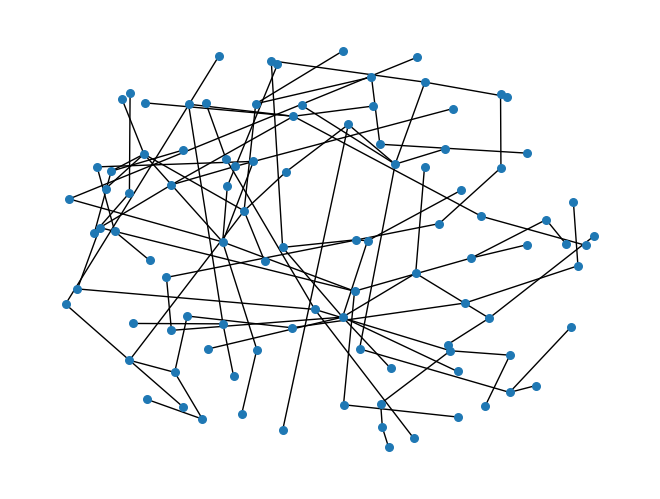

In [ ]:
G = generate_connected_graph(100, 2, seed=42)
print(f"✅ Graph generated with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
nx.draw(G, node_size=30)
plt.show()


## Full Experiment: Cover Size and Runtime

We now evaluate the performance of Greedy and Monte Carlo algorithms on:
- Graph sizes: 100, 500, 1000 nodes
- Average degrees: 2, 4, 8

For each combination, we measure:
- Vertex cover size
- Execution time (seconds)
- Monte Carlo: average over 10 runs


In [ ]:
node_sizes = [100, 500, 1000]
avg_degrees = [2, 4, 8]
results = []

for n in node_sizes:
    for d in avg_degrees:
        print(f"\n🔧 Generating graph for n={n}, avg_degree={d}")
        G = generate_connected_graph(n, d, seed=42)

        # Greedy
        print("⚙️ Running Greedy Algorithm...")
        greedy_cover, greedy_time = greedy_vertex_cover(G)

        # Monte Carlo (10 runs)
        print("🎲 Running Monte Carlo 10 times...")
        mc_covers = []
        mc_times = []

        for i in range(10):
            mc_cover, mc_time = monte_carlo_vertex_cover(G, seed=i)
            mc_covers.append(len(mc_cover))
            mc_times.append(mc_time)

        results.append({
            "nodes": n,
            "degree": d,
            "greedy_size": len(greedy_cover),
            "greedy_time": greedy_time,
            "mc_avg_size": np.mean(mc_covers),
            "mc_avg_time": np.mean(mc_times)
        })

import pandas as pd
df_results = pd.DataFrame(results)
df_results



🔧 Generating graph for n=100, avg_degree=2
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=100, avg_degree=4
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=100, avg_degree=8
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=500, avg_degree=2
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=500, avg_degree=4
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=500, avg_degree=8
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=1000, avg_degree=2
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=1000, avg_degree=4
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...

🔧 Generating graph for n=1000, avg_degree=8
⚙️ Running Greedy Algorithm...
🎲 Running Monte Carlo 10 times...


,nodes,degree,greedy_size,greedy_time,mc_avg_size,mc_avg_time
0,100,2,45,0.001676,73.6,0.001883
1,100,4,62,0.002614,83.2,0.002250
2,100,8,73,0.002261,91.8,0.003004
3,500,2,213,0.036308,359.2,0.043120
4,500,4,275,0.045839,402.2,0.052208
5,500,8,340,0.050656,444.0,0.085289
6,1000,2,446,0.176894,747.2,0.279814
7,1000,4,572,0.184011,827.8,0.216215
8,1000,8,684,0.396782,889.2,0.345312


## Result Visualization

We plot:
- Vertex cover size vs. number of nodes
- Runtime vs. number of nodes

This helps us compare algorithm performance and scalability.


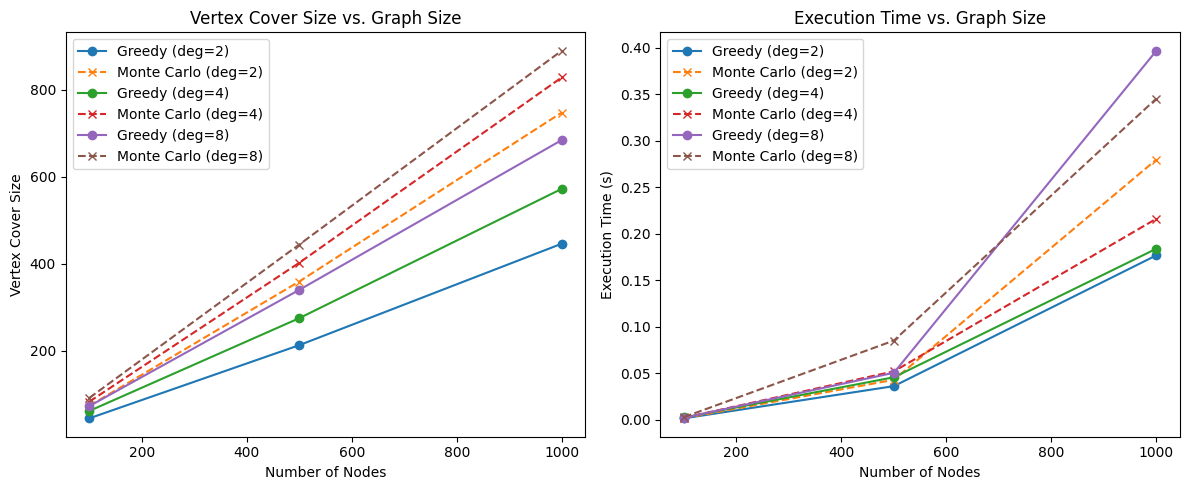

In [ ]:
import seaborn as sns

# Cover Size Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for d in sorted(df_results['degree'].unique()):
    subset = df_results[df_results['degree'] == d]
    plt.plot(subset['nodes'], subset['greedy_size'], label=f'Greedy (deg={d})', marker='o')
    plt.plot(subset['nodes'], subset['mc_avg_size'], label=f'Monte Carlo (deg={d})', marker='x', linestyle='--')
plt.xlabel("Number of Nodes")
plt.ylabel("Vertex Cover Size")
plt.title("Vertex Cover Size vs. Graph Size")
plt.legend()

# Runtime Plot
plt.subplot(1, 2, 2)
for d in sorted(df_results['degree'].unique()):
    subset = df_results[df_results['degree'] == d]
    plt.plot(subset['nodes'], subset['greedy_time'], label=f'Greedy (deg={d})', marker='o')
    plt.plot(subset['nodes'], subset['mc_avg_time'], label=f'Monte Carlo (deg={d})', marker='x', linestyle='--')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs. Graph Size")
plt.legend()

plt.tight_layout()
plt.show()


---

#  Conclusion

In this project, we implemented and analyzed two classic approximation algorithms for the **Vertex Cover Problem**:

- **Greedy Algorithm**: Selects the highest-degree vertex repeatedly.
- **Monte Carlo Algorithm**: Randomly picks uncovered edges and adds both endpoints.

We ran both algorithms on synthetic graphs of various sizes and densities, using a custom generator to ensure connectivity and control over average degree.

---


- **Greedy consistently produced smaller vertex covers** across all graph sizes and densities.
- **Monte Carlo had greater variance** in performance, especially on denser graphs.
- **Greedy was significantly faster** and more scalable for large graphs.
- **Monte Carlo was easier to implement**, but less efficient in both time and result quality.



- The **Greedy algorithm is preferred** in most practical scenarios due to its speed and quality.
- **Monte Carlo is useful** in randomized settings or when exploring probabilistic algorithm behavior.
- This experiment highlights the importance of balancing **accuracy**, **execution time**, and **scalability** in algorithm design.



